<a href="https://colab.research.google.com/github/BVamshikrishna/Online-Shoppers-Intention/blob/main/Online_Shoppers_Intention.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("/content/drive/MyDrive/Ml Projects/online_shoppers_intention.csv")
df.head()
df.shape

(12330, 18)

In [3]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0.0,0.0,0.0,0.0,1.0,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0.0,0.0,0.0,0.0,2.0,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0.0,-1.0,0.0,-1.0,1.0,-1.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0.0,0.0,0.0,0.0,2.0,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0.0,0.0,0.0,0.0,10.0,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [4]:
#df.describe(include='all')
df.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.317798,80.906176,0.503979,34.506387,31.763884,1196.037057,0.022152,0.043003,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.322754,176.860432,1.270701,140.825479,44.490339,1914.372511,0.048427,0.048527,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,-1.000000,0.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,185.000000,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,8.000000,0.000000,0.000000,18.000000,599.766190,0.003119,0.025124,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.500000,0.000000,0.000000,38.000000,1466.479902,0.016684,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12316 non-null  float64
 1   Administrative_Duration  12316 non-null  float64
 2   Informational            12316 non-null  float64
 3   Informational_Duration   12316 non-null  float64
 4   ProductRelated           12316 non-null  float64
 5   ProductRelated_Duration  12316 non-null  float64
 6   BounceRates              12316 non-null  float64
 7   ExitRates                12316 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [6]:
df['Administrative'] = df['Administrative'].astype(object)
df['Informational'] = df['Informational'].astype(object)
df['ProductRelated'] = df['ProductRelated'].astype(object)
df['SpecialDay'] = df['SpecialDay'].astype(object)
df['OperatingSystems'] = df['OperatingSystems'].astype(object)
df['Browser'] = df['Browser'].astype(object)
df['Region'] = df['Region'].astype(object)
df['TrafficType'] = df['TrafficType'].astype(object)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12316 non-null  object 
 1   Administrative_Duration  12316 non-null  float64
 2   Informational            12316 non-null  object 
 3   Informational_Duration   12316 non-null  float64
 4   ProductRelated           12316 non-null  object 
 5   ProductRelated_Duration  12316 non-null  float64
 6   BounceRates              12316 non-null  float64
 7   ExitRates                12316 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  object 
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  object 
 12  Browser                  12330 non-null  object 
 13  Region                   12330 non-null  object 
 14  TrafficType           

Exploratory Data Analysis

Univariate Analysis

In [7]:
# Checking Unique Visitor Types
df['VisitorType'].value_counts()

Returning_Visitor    10551
New_Visitor           1694
Other                   85
Name: VisitorType, dtype: int64

In [8]:
# Checking Unique Browser
df['Browser'].value_counts()

2     7961
1     2462
4      736
5      467
6      174
10     163
8      135
3      105
13      61
7       49
12      10
11       6
9        1
Name: Browser, dtype: int64

In [9]:
num_column = ['Administrative_Duration','Informational_Duration','ProductRelated_Duration','BounceRates','ExitRates','PageValues']

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff551100490>,
      dtype=object)

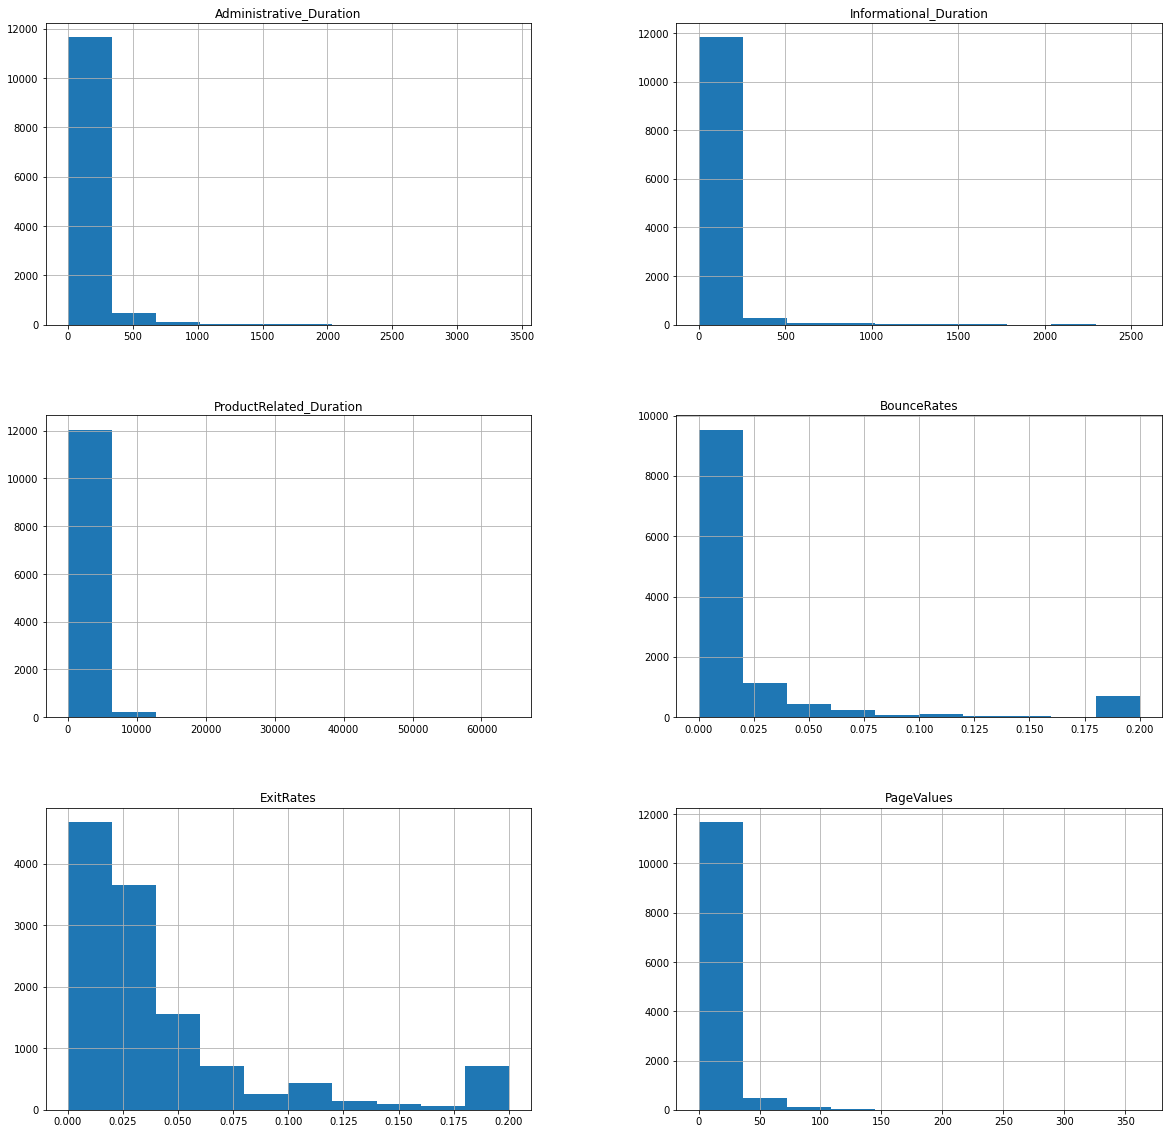

In [10]:
df.hist(column=num_column, figsize=(20,20))

Class Imbalance


Text(0, 0.5, '')

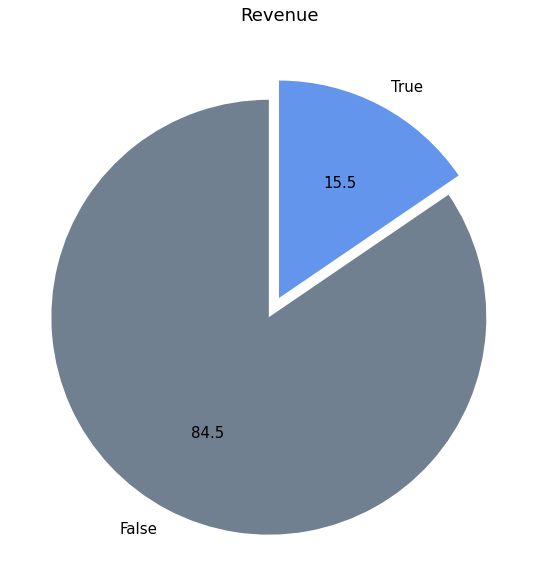

In [11]:
plt.figure(figsize=(10,10))
df['Revenue'].value_counts().plot(kind='pie',autopct='%1.1f', textprops={'fontsize': 15},startangle=90,explode =(0.1,0),colors=['slategray','cornflowerblue'])
plt.title('Revenue', fontsize = 18)
plt.ylabel('')

Univarient Analysis

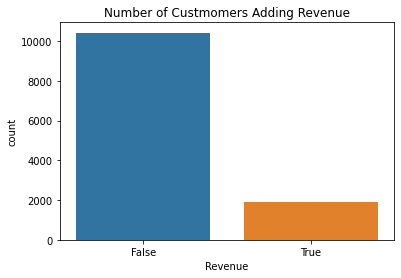

In [12]:
plt.title("Number of Custmomers Adding Revenue")
sns.countplot(df['Revenue'])

Bi-Varient Analysis

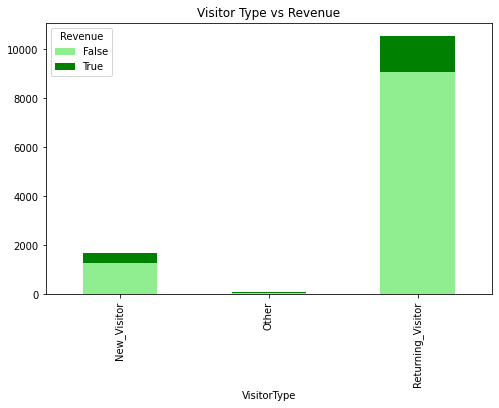

In [13]:
# cato vs Cato
# visitor type vs revenue
data = pd.crosstab(df['VisitorType'], df['Revenue'])
data.plot(kind = 'bar', stacked = True, figsize = (8, 5), color = ['lightgreen', 'green'])
plt.title('Visitor Type vs Revenue')
plt.show()

Multivarient Analysis

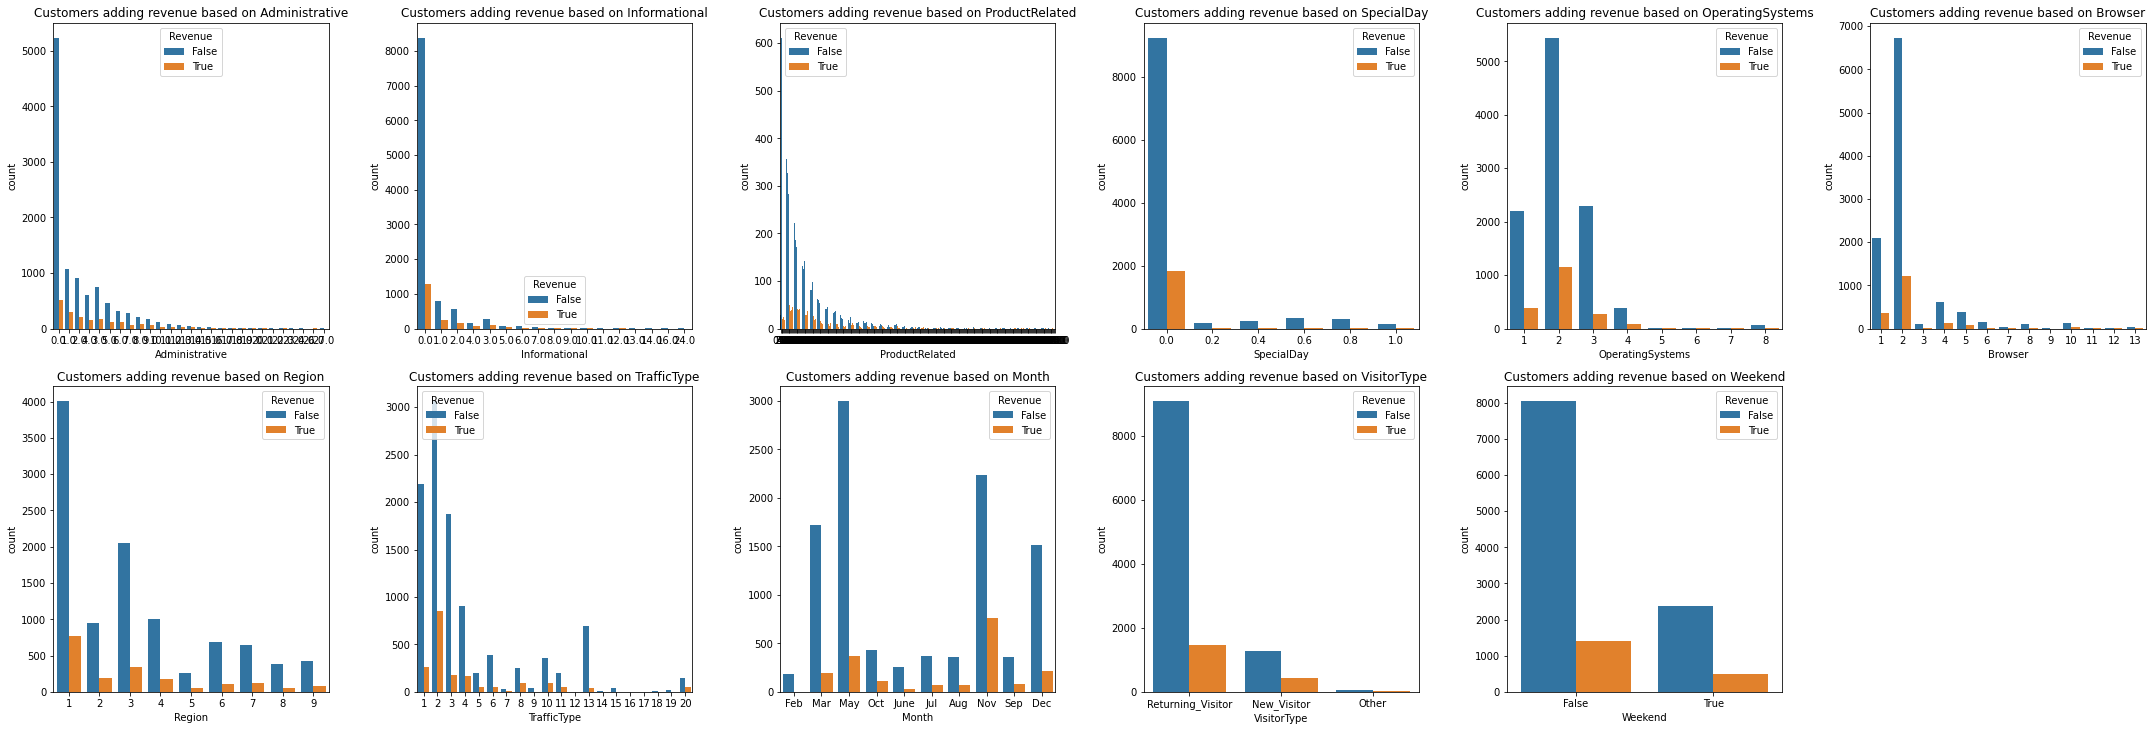

In [14]:
obj_column = ['Administrative', 'Informational','ProductRelated','SpecialDay','OperatingSystems',
              'Browser','Region','TrafficType','Month','VisitorType','Weekend']
plt.figure(figsize=(30,30))
plot_number = 0
for i in obj_column:
  plot_number = plot_number+1
  ax = plt.subplot(6,6,plot_number, adjustable='datalim')
  sns.countplot(df[i], hue = df['Revenue'])
  ax.set_title('Customers adding revenue based on '+i,fontdict = None)
  plt.tight_layout()


Month vs PageValues vs Revenue


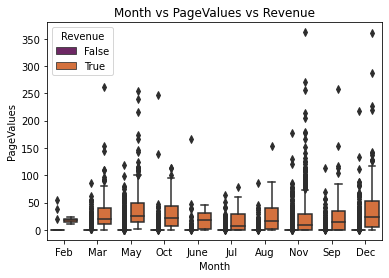

In [15]:
sns.boxplot(x = df['Month'], y = df['PageValues'], hue = df['Revenue'], palette='inferno')
plt.title("Month vs PageValues vs Revenue")
plt.show()

Chi-Square

to determine weather there is a statistical significance of various Features we use Chi-Square

Weekend

In [16]:
df_w = df[['Weekend', 'Revenue']]
df_w.head()

,Weekend,Revenue
0,False,False
1,False,False
2,False,False
3,False,False
4,True,False


In [17]:
df_w1 = pd.get_dummies(df_w)
df_w1.head()

,Weekend,Revenue
0,False,False
1,False,False
2,False,False
3,False,False
4,True,False


In [18]:
df_w1.Weekend = df_w1.Weekend.map({False:0, True:1})
df_w1.Revenue = df_w1.Revenue.map({False:0, True:1})
df_w1.head()

,Weekend,Revenue
0,0,0
1,0,0
2,0,0
3,0,0
4,1,0


In [19]:
from scipy.stats import chi2_contingency
from scipy.stats import chi2
ct = pd.crosstab(df_w['Weekend'],df_w['Revenue'])
ct

Revenue,False,True
Weekend,,
False,8053,1409
True,2369,499


In [20]:
nn = np.array(ct)
nn

array([[8053, 1409],
       [2369,  499]])

HYPOTHESIS

HO = The variable are Independent.

HA = The variable are Dependent

In [21]:
stat, p, dof, expected = chi2_contingency(nn)
print('dof=%d' % dof)
print(expected)
# interpret test-statistic
prob = 0.95
critical = chi2.ppf(prob, dof)
print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))
if abs(stat) >= critical:
    print(' Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')
# interpret p-value
alpha = 1.0 - prob
print('significance=%.3f, p=%.3f' % (alpha, p))
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (fail)')

dof=1
[[7997.80729927 1464.19270073]
 [2424.19270073  443.80729927]]
probability=0.950, critical=3.841, stat=10.391
 Dependent (reject H0)
significance=0.050, p=0.001
Dependent (reject H0)


In [22]:
df.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'Revenue'],
      dtype='object')

Visitor Type

In [23]:
df_vt = pd.crosstab(df.VisitorType, df.Revenue)
df_vt

Revenue,False,True
VisitorType,,
New_Visitor,1272,422
Other,69,16
Returning_Visitor,9081,1470


In [24]:
vt = np.array(df_vt)
vt

array([[1272,  422],
       [  69,   16],
       [9081, 1470]])

In [25]:
stat, p, dof, expected = chi2_contingency(vt)
print('dof=%d' % dof)
print(expected)
# interpret test-statistic
prob = 0.95
critical = chi2.ppf(prob, dof)
print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))
if abs(stat) >= critical:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')
# interpret p-value
alpha = 1.0 - prob
print('significance=%.3f, p=%.3f' % (alpha, p))
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')

dof=2
[[1431.86277372  262.13722628]
 [  71.84671533   13.15328467]
 [8918.29051095 1632.70948905]]
probability=0.950, critical=5.991, stat=135.252
Dependent (reject H0)
significance=0.050, p=0.000
Dependent (reject H0)


Traffic Type

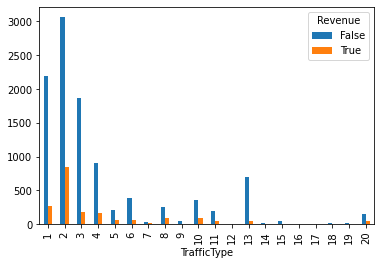

In [26]:
df_tt = pd.crosstab(df.TrafficType, df.Revenue)
df_tt.plot(kind = 'bar')

In [27]:
df_tt.TrafficType = df.TrafficType.replace(to_replace = [5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20], value = 5)

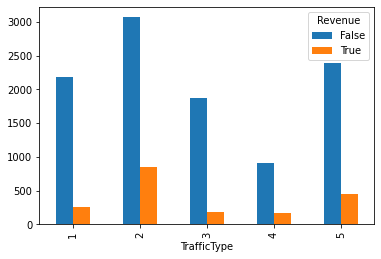

In [28]:
df_tt = pd.crosstab(df_tt.TrafficType, df.Revenue)
df_tt.plot(kind = 'bar')

In [29]:
df.TrafficType.nunique()

20

In [30]:
tt = np.array(df_tt)
tt

array([[2189,  262],
       [3066,  847],
       [1872,  180],
       [ 904,  165],
       [2391,  454]])

In [31]:
stat, p, dof, expected = chi2_contingency(tt)
print('dof=%d' % dof)
print(expected)
# interpret test-statistic
prob = 0.95
critical = chi2.ppf(prob, dof)
print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))
if abs(stat) >= critical:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')
# interpret p-value
alpha = 1.0 - prob
print('significance=%.3f, p=%.3f' % (alpha, p))
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')

dof=4
[[2071.72116788  379.27883212]
 [3307.48467153  605.51532847]
 [1734.46423358  317.53576642]
 [ 903.57810219  165.42189781]
 [2404.75182482  440.24817518]]
probability=0.950, critical=9.488, stat=227.828
Dependent (reject H0)
significance=0.050, p=0.000
Dependent (reject H0)


Region

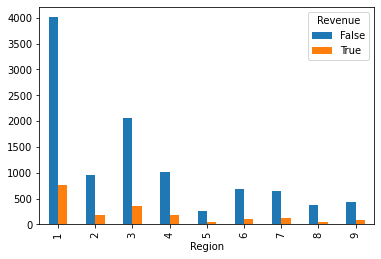

In [32]:
df_r = pd.crosstab(df.Region, df.Revenue)
df_r.plot(kind = 'bar')
plt.show()

In [33]:
df_r

Revenue,False,True
Region,,
1,4009,771
2,948,188
3,2054,349
4,1007,175
5,266,52
6,693,112
7,642,119
8,378,56
9,425,86


In [34]:
df_r.iloc[5,:]

Revenue
False    693
True     112
Name: 6, dtype: int64

In [35]:
df_r.Region = df.Region.replace(to_replace = [5,6,7,8,9], value = 5)

In [36]:
print(df.Region.nunique())
print(df_r.Region.unique())

9
[1 5 2 3 4]


In [37]:
df_r.Region.unique()

array([1, 5, 2, 3, 4])

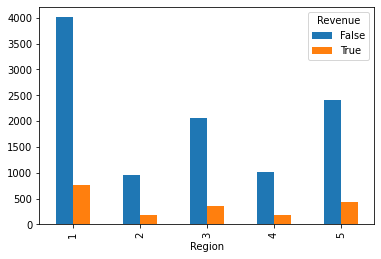

In [38]:
df_r = pd.crosstab(df_r.Region, df.Revenue)
df_r.plot(kind = 'bar')
plt.show()

In [39]:
rg = np.array(df_r)
rg

array([[4009,  771],
       [ 948,  188],
       [2054,  349],
       [1007,  175],
       [2404,  425]])

In [40]:
stat, p, dof, expected = chi2_contingency(rg)
print('dof=%d' % dof)
print(expected)
# interpret test-statistic
prob = 0.95
critical = chi2.ppf(prob, dof)
print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))
if abs(stat) >= critical:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')
# interpret p-value
alpha = 1.0 - prob
print('significance=%.3f, p=%.3f' % (alpha, p))
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')

dof=4
[[4040.32116788  739.67883212]
 [ 960.21021898  175.78978102]
 [2031.14890511  371.85109489]
 [ 999.0919708   182.9080292 ]
 [2391.22773723  437.77226277]]
probability=0.950, critical=9.488, stat=5.079
Independent (fail to reject H0)
significance=0.050, p=0.279
Independent (fail to reject H0)


Browser

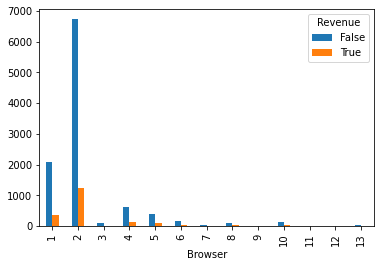

In [41]:
df_b = pd.crosstab(df.Browser, df.Revenue)
df_b.plot(kind = 'bar')
plt.show()

In [42]:
df_b.Browser = df.Browser.replace(to_replace = [3,4,5,6,7,8,9,10,11,12,13], value = 3)

In [43]:
print(df.Browser.nunique())
print(df_b.Browser.unique())

13
[1 2 3]


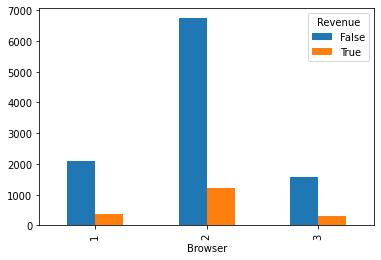

In [44]:
df_b = pd.crosstab(df_b.Browser, df.Revenue)
df_b.plot(kind = 'bar')

In [45]:
b = np.array(df_b)
b

array([[2097,  365],
       [6738, 1223],
       [1587,  320]])

In [46]:
stat, p, dof, expected = chi2_contingency(b)
print('dof=%d' % dof)
print(expected)
# interpret test-statistic
prob = 0.95
critical = chi2.ppf(prob, dof)
print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))
if abs(stat) >= critical:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')
# interpret p-value
alpha = 1.0 - prob
print('significance=%.3f, p=%.3f' % (alpha, p))
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')

dof=2
[[2081.0189781   380.9810219 ]
 [6729.07883212 1231.92116788]
 [1611.90218978  295.09781022]]
probability=0.950, critical=5.991, stat=3.356
Independent (fail to reject H0)
significance=0.050, p=0.187
Independent (fail to reject H0)


Operating Systems 

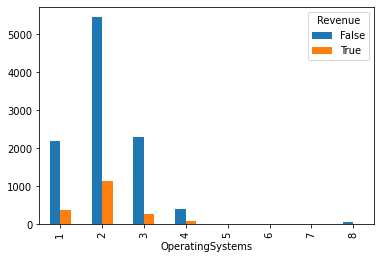

In [47]:
df_os = pd.crosstab(df.OperatingSystems, df.Revenue)
df_os.plot(kind = 'bar')
plt.show()

In [48]:
df_os

Revenue,False,True
OperatingSystems,,
1,2206,379
2,5446,1155
3,2287,268
4,393,85
5,5,1
6,17,2
7,6,1
8,62,17


In [49]:
df_os.OperatingSystems = df.OperatingSystems.replace(to_replace = [4,5,6,7,8], value =4)

In [50]:
df_os = pd.crosstab(df_os.OperatingSystems, df.Revenue)
df_os

Revenue,False,True
OperatingSystems,,
1,2206,379
2,5446,1155
3,2287,268
4,483,106


In [51]:
os = np.array(df_os)
os

array([[2206,  379],
       [5446, 1155],
       [2287,  268],
       [ 483,  106]])

In [52]:
stat, p, dof, expected = chi2_contingency(os)
print('dof=%d' % dof)
print(expected)
# interpret test-statistic
prob = 0.95
critical = chi2.ppf(prob, dof)
print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))
if abs(stat) >= critical:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')
# interpret p-value
alpha = 1.0 - prob
print('significance=%.3f, p=%.3f' % (alpha, p))
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')

dof=3
[[2184.98540146  400.01459854]
 [5579.53138686 1021.46861314]
 [2159.62773723  395.37226277]
 [ 497.85547445   91.14452555]]
probability=0.950, critical=7.815, stat=73.368
Dependent (reject H0)
significance=0.050, p=0.000
Dependent (reject H0)


Month

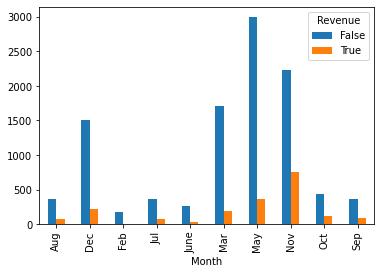

In [53]:
df_m = pd.crosstab(df.Month, df.Revenue)
df_m.plot(kind = 'bar')
plt.show()

In [54]:
df_m.Month = df.Month.replace(to_replace = ['Aug','Feb',' Jul','June','Oct', 'Sep'], value = 'Rest')

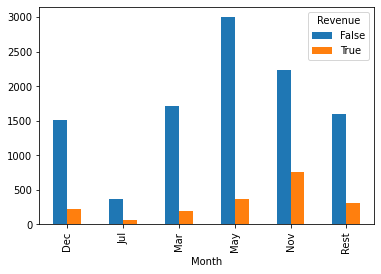

In [55]:
df_m = pd.crosstab(df_m.Month, df.Revenue)
df_m.plot(kind = 'bar')
plt.show()

In [56]:
m = np.array(df_m)
m

array([[1511,  216],
       [ 366,   66],
       [1715,  192],
       [2999,  365],
       [2238,  760],
       [1593,  309]])

In [57]:
stat, p, dof, expected = chi2_contingency(m)
print('dof=%d' % dof)
print(expected)
# interpret test-statistic
prob = 0.95
critical = chi2.ppf(prob, dof)
print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))
if abs(stat) >= critical:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')
# interpret p-value
alpha = 1.0 - prob
print('significance=%.3f, p=%.3f' % (alpha, p))
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')

dof=5
[[1459.75620438  267.24379562]
 [ 365.15036496   66.84963504]
 [1611.90218978  295.09781022]
 [2843.43941606  520.56058394]
 [2534.07591241  463.92408759]
 [1607.67591241  294.32408759]]
probability=0.950, critical=11.070, stat=333.662
Dependent (reject H0)
significance=0.050, p=0.000
Dependent (reject H0)


Special Day

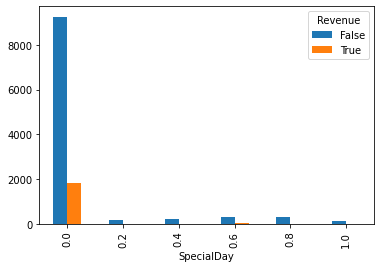

In [58]:
df_sd = pd.crosstab(df.SpecialDay, df.Revenue)
df_sd.plot(kind = 'bar')
plt.show()

In [59]:
df_sd.SpecialDay = df.SpecialDay.replace(to_replace = [0.2,0.4,0.6,0.8,1.0], value = 1.0)

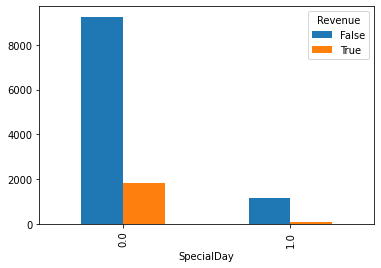

In [60]:
df_sd = pd.crosstab(df_sd.SpecialDay, df.Revenue)
df_sd.plot(kind = 'bar')
plt.show()

In [61]:
sd = np.array(df_sd)
sd

array([[9248, 1831],
       [1174,   77]])

In [62]:
stat, p, dof, expected = chi2_contingency(sd)
print('dof=%d' % dof)
print(expected)
# interpret test-statistic
prob = 0.95
critical = chi2.ppf(prob, dof)
print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))
if abs(stat) >= critical:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')
# interpret p-value
alpha = 1.0 - prob
print('significance=%.3f, p=%.3f' % (alpha, p))
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')

dof=1
[[9364.58540146 1714.41459854]
 [1057.41459854  193.58540146]]
probability=0.950, critical=3.841, stat=91.655
Dependent (reject H0)
significance=0.050, p=0.000
Dependent (reject H0)


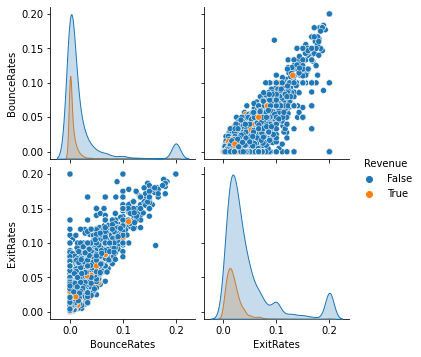

In [63]:
sns.pairplot(df,x_vars=['BounceRates','ExitRates'],y_vars=['BounceRates','ExitRates'],hue='Revenue',diag_kind='kde')
plt.show()

In [64]:
df.isnull().sum()[df.isnull().sum()>0]

Administrative             14
Administrative_Duration    14
Informational              14
Informational_Duration     14
ProductRelated             14
ProductRelated_Duration    14
BounceRates                14
ExitRates                  14
dtype: int64

Outlier Treatment

In [65]:
# For Administrative_Duaration
q1_adm=np.quantile(df.Administrative_Duration,0.25)
q3_adm=np.quantile(df.Administrative_Duration,0.75)
iqr_adm=q3_adm-q1_adm
ll=q1_adm-(1.5*iqr_adm)
ul=q3_adm+(1.5*iqr_adm)
df_ad_out=df[(df.Administrative_Duration<ll) | (df.Administrative_Duration>ul)]
df_ad_out.shape

(0, 18)

In [66]:
# for Informational_Duration
q1_inf=np.quantile(df.Informational_Duration,0.25)
q3_inf=np.quantile(df.Informational_Duration,0.75)
iqr_inf=q3_inf-q1_inf
ll=q1_inf-(1.5*iqr_inf)
ul=q3_inf+(1.5*iqr_inf)
df_inf_out=df[(df.Informational_Duration<ll) | (df.Informational_Duration>ul)]
df_inf_out.shape

(0, 18)

In [67]:
# for Product Related Duaration
q1_pro=np.quantile(df.ProductRelated_Duration,0.25)
q3_pro=np.quantile(df.ProductRelated_Duration,0.75)
iqr_pro=q3_pro-q1_pro
ll=q1_pro-(1.5*iqr_pro)
ul=q3_pro+(1.5*iqr_pro)
df_pro_out=df[(df.ProductRelated_Duration<ll) | (df.ProductRelated_Duration>ul)]
df_pro_out.shape

(0, 18)

In [68]:
# For Bounce Rate
q1_bou=np.quantile(df.BounceRates,0.25)
q3_bou=np.quantile(df.BounceRates,0.75)
iqr_bou=q3_bou-q1_bou
ll=q1_bou-(1.5*iqr_bou)
ul=q3_bou+(1.5*iqr_bou)
df_bou_out=df[(df.BounceRates<ll) | (df.BounceRates>ul)]
df_bou_out.shape

(0, 18)

In [69]:
# for Exit Rate
q1_ex=np.quantile(df.ExitRates,0.25)
q3_ex=np.quantile(df.ExitRates,0.75)
iqr_ex=q3_ex-q1_ex
ll=q1_ex-(1.5*iqr_ex)
ul=q3_ex+(1.5*iqr_ex)
df_ex_out=df[(df.ExitRates<ll) | (df.ExitRates>ul)]
df_ex_out.shape

(0, 18)

In [70]:
# for Page Values
q1_pg=np.quantile(df.PageValues,0.25)
q3_pg=np.quantile(df.PageValues,0.75)
iqr_pg=q3_pg-q1_pg
ll=q1_pg-(1.5*iqr_pg)
ul=q3_pg+(1.5*iqr_pg)
df_pg_out=df[(df.PageValues<ll) | (df.PageValues>ul)]
df_pg_out.shape

(2730, 18)

In [71]:
dff=pd.DataFrame()

In [72]:
dff['Administrative_Duration']=df.index.isin(df_ad_out.index)
dff['Informational_Duration']=df.index.isin(df_inf_out.index)
dff['ProductRelated_Duration']=df.index.isin(df_pro_out.index)
dff['BounceRates']=df.index.isin(df_bou_out.index)
dff['ExitRates']=df.index.isin(df_ex_out.index)
dff['PageValues']=df.index.isin(df_pg_out.index)

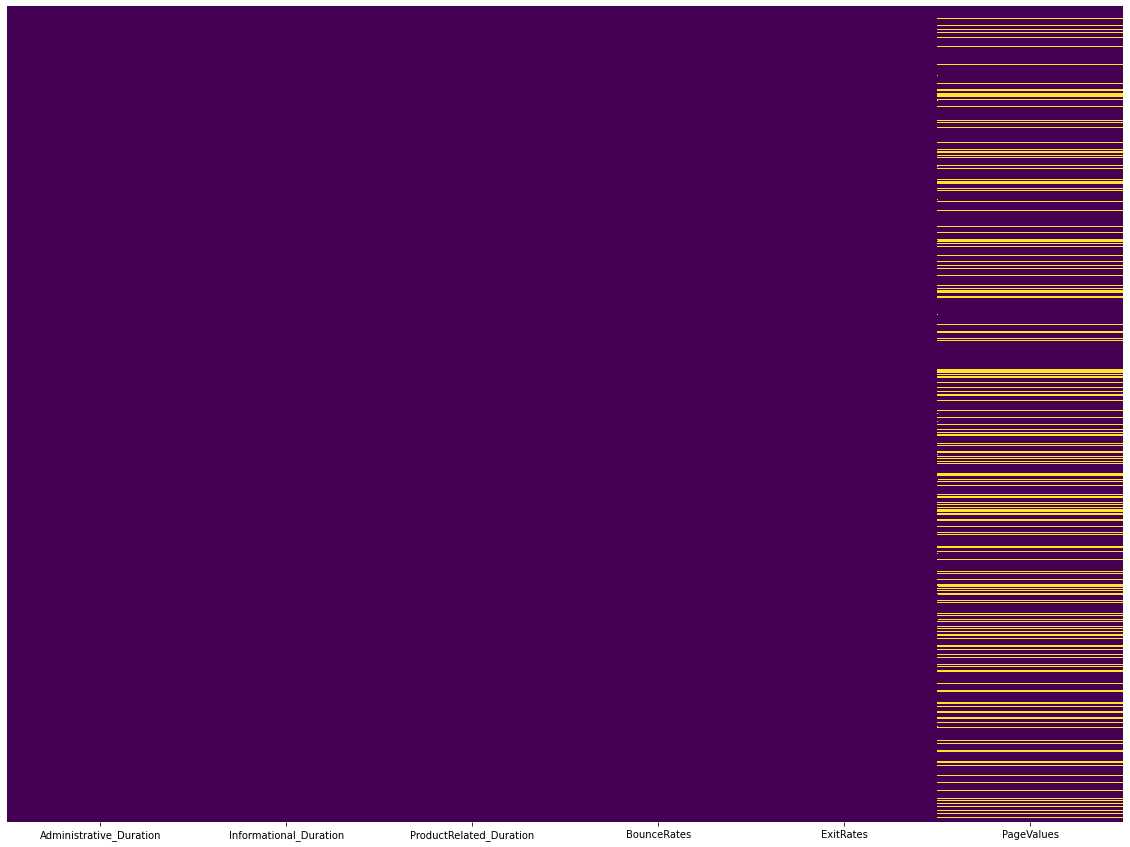

In [73]:
# Plotting heat map for Otliers
plt.figure(figsize=(20,15))
sns.heatmap(dff , yticklabels = False , cbar = False , cmap = 'viridis')
plt.show()

Above Heatmap is For Variables Administrative_Duration, Informational_Duration, ProductRelatedDuration, BounceRates, ExitRates, PageValues. Inwhich Yellow lines Represents the presence of Outliers...

In [74]:
# Converting Booleans into 1's and 0's
bool_map={True:1,False:0}
df.Weekend.replace(bool_map,inplace=True)
df.Revenue.replace(bool_map,inplace=True)

In [75]:
df.head()


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0,Feb,1,1,1,1,Returning_Visitor,0,0
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0,Feb,2,2,1,2,Returning_Visitor,0,0
2,0,-1.0,0,-1.0,1,-1.000000,0.20,0.20,0.0,0,Feb,4,1,9,3,Returning_Visitor,0,0
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0,Feb,3,2,2,4,Returning_Visitor,0,0
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0,Feb,3,3,1,4,Returning_Visitor,1,0


In [76]:
dff.head()

,Administrative_Duration,Informational_Duration,ProductRelated_Duration,BounceRates,ExitRates,PageValues
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False


In [77]:
dff['multi'] = ['Y' if x >= 4 else 'N' for x in np.sum(dff.values == True, 1)]

In [78]:
dff['multi'] = ['Y' if x >= 4 else 'N' for x in np.sum(dff.values == True, 1)]

In [79]:
df_new=df[dff['multi']=='N']
df_new.shape

(12330, 18)

In [80]:
# Converting Booleans into 1's and 0's
bool_map={True:1,False:0}
df_new.Weekend.replace(bool_map,inplace=True)
df_new.Revenue.replace(bool_map,inplace=True)
df_new.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0,Feb,1,1,1,1,Returning_Visitor,0,0
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0,Feb,2,2,1,2,Returning_Visitor,0,0
2,0,-1.0,0,-1.0,1,-1.000000,0.20,0.20,0.0,0,Feb,4,1,9,3,Returning_Visitor,0,0
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0,Feb,3,2,2,4,Returning_Visitor,0,0
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0,Feb,3,3,1,4,Returning_Visitor,1,0


In [81]:
# Replacing the Outliers with NAN
df_new.loc[(dff['Administrative_Duration']==True),'Administrative_Duration']=np.NAN
df_new.loc[(dff['Informational_Duration']==True),'Informational_Duration']=np.NAN
df_new.loc[(dff['ProductRelated_Duration']==True),'ProductRelated_Duration']=np.NAN
df_new.loc[(dff['BounceRates']==True),'BounceRates']=np.NAN
df_new.loc[(dff['PageValues']==True),'PageValues']=np.NAN
#df_new=df_new.drop('ExitRates',axis=1)

In [82]:
df_new.isnull().sum()[df_new.isnull().sum()>0]

Administrative               14
Administrative_Duration      14
Informational                14
Informational_Duration       14
ProductRelated               14
ProductRelated_Duration      14
BounceRates                  14
ExitRates                    14
PageValues                 2730
dtype: int64

In [83]:
imp_col=df_new.isnull().sum()[df_new.isnull().sum()>0].index

In [84]:
# Creating dummy Variables
df_dum=pd.get_dummies(df_new)
df_dum.head()

,Administrative_Duration,Informational_Duration,ProductRelated_Duration,BounceRates,ExitRates,PageValues,Weekend,Revenue,Administrative_0.0,Administrative_1.0,Administrative_2.0,Administrative_3.0,Administrative_4.0,Administrative_5.0,Administrative_6.0,Administrative_7.0,Administrative_8.0,Administrative_9.0,Administrative_10.0,Administrative_11.0,Administrative_12.0,Administrative_13.0,Administrative_14.0,Administrative_15.0,Administrative_16.0,Administrative_17.0,Administrative_18.0,Administrative_19.0,Administrative_20.0,Administrative_21.0,Administrative_22.0,Administrative_23.0,Administrative_24.0,Administrative_26.0,Administrative_27.0,Informational_0.0,Informational_1.0,Informational_2.0,Informational_3.0,Informational_4.0,...,Browser_6,Browser_7,Browser_8,Browser_9,Browser_10,Browser_11,Browser_12,Browser_13,Region_1,Region_2,Region_3,Region_4,Region_5,Region_6,Region_7,Region_8,Region_9,TrafficType_1,TrafficType_2,TrafficType_3,TrafficType_4,TrafficType_5,TrafficType_6,TrafficType_7,TrafficType_8,TrafficType_9,TrafficType_10,TrafficType_11,TrafficType_12,TrafficType_13,TrafficType_14,TrafficType_15,TrafficType_16,TrafficType_17,TrafficType_18,TrafficType_19,TrafficType_20,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor
0,0.0,0.0,0.000000,0.20,0.20,0.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,0.0,0.0,64.000000,0.00,0.10,0.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,-1.0,-1.0,-1.000000,0.20,0.20,0.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,0.0,0.0,2.666667,0.05,0.14,0.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,0.0,0.0,627.500000,0.02,0.05,0.0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


After Converting the Outliers into NAN, we need to assign values to this null/missing Values. Here we are using MICE(Missing Imputaions through Chained Equations) technique for imputing the missing values.

In [85]:
!pip install impyute


In [86]:
from impyute.imputation.cs import mice

In [87]:
imputed_df=mice(df_dum.values)

In [88]:
imputed_df=pd.DataFrame(imputed_df,columns=df_dum.columns)

In [89]:
imputed_df.head()

,Administrative_Duration,Informational_Duration,ProductRelated_Duration,BounceRates,ExitRates,PageValues,Weekend,Revenue,Administrative_0.0,Administrative_1.0,Administrative_2.0,Administrative_3.0,Administrative_4.0,Administrative_5.0,Administrative_6.0,Administrative_7.0,Administrative_8.0,Administrative_9.0,Administrative_10.0,Administrative_11.0,Administrative_12.0,Administrative_13.0,Administrative_14.0,Administrative_15.0,Administrative_16.0,Administrative_17.0,Administrative_18.0,Administrative_19.0,Administrative_20.0,Administrative_21.0,Administrative_22.0,Administrative_23.0,Administrative_24.0,Administrative_26.0,Administrative_27.0,Informational_0.0,Informational_1.0,Informational_2.0,Informational_3.0,Informational_4.0,...,Browser_6,Browser_7,Browser_8,Browser_9,Browser_10,Browser_11,Browser_12,Browser_13,Region_1,Region_2,Region_3,Region_4,Region_5,Region_6,Region_7,Region_8,Region_9,TrafficType_1,TrafficType_2,TrafficType_3,TrafficType_4,TrafficType_5,TrafficType_6,TrafficType_7,TrafficType_8,TrafficType_9,TrafficType_10,TrafficType_11,TrafficType_12,TrafficType_13,TrafficType_14,TrafficType_15,TrafficType_16,TrafficType_17,TrafficType_18,TrafficType_19,TrafficType_20,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor
0,0.0,0.0,0.000000,0.20,0.20,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,64.000000,0.00,0.10,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,-1.0,-1.0,-1.000000,0.20,0.20,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,2.666667,0.05,0.14,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,627.500000,0.02,0.05,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [90]:
X=imputed_df.drop(['Revenue','ExitRates'],axis=1)
Y=imputed_df.Revenue
#Y.value_counts(normalize=True)

In [91]:
from sklearn.metrics import f1_score,cohen_kappa_score,classification_report,confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

Spliting the data into Train and test



In [92]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=1)

Our Target Variable is Imbalanced First we train model without bakacing the target vairble and

Later we will train the model using Oversampling technique SMOTE (Synthetic Minority Over-sampling Technique) From imblearn library







Without SMOTE

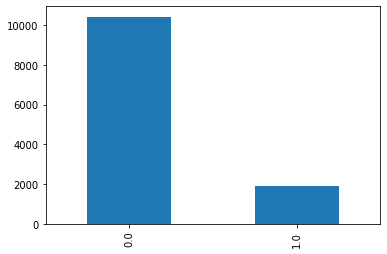

In [93]:
imputed_df['Revenue'].value_counts().plot(kind='bar')
plt.show()

Logistic Regression

In [94]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
log=LogisticRegression(C=0.005994,penalty='l1',solver='liblinear')
log.fit(x_train,y_train)
print('Train score:',log.score(x_train,y_train))
print('Test score:',log.score(x_test,y_test))
#log.C_

Train score: 0.8426601784266018
Test score: 0.8513111651797783


In [95]:
log_pred=log.predict(x_test)
print('F1 Score:',f1_score(y_test,log_pred))
print('Kappa Score:',cohen_kappa_score(y_test,log_pred))
print('Classification report:\n',classification_report(y_test,log_pred))

F1 Score: 0.0
Kappa Score: 0.0
Classification report:
               precision    recall  f1-score   support

         0.0       0.85      1.00      0.92      3149
         1.0       0.00      0.00      0.00       550

    accuracy                           0.85      3699
   macro avg       0.43      0.50      0.46      3699
weighted avg       0.72      0.85      0.78      3699



In [96]:
from sklearn.metrics import roc_curve,auc
from sklearn.ensemble import GradientBoostingClassifier,RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

In [97]:
fpr,tpr,thresh=roc_curve(y_test,log_pred)
auc_log=auc(fpr,tpr)

Decision Tree

In [98]:
dt=DecisionTreeClassifier(max_depth=6)
dt.fit(x_train,y_train)
print('Train score:',dt.score(x_train,y_train))
print('Test score:',dt.score(x_test,y_test))

Train score: 0.8537828756806859
Test score: 0.8442822384428224


In [99]:
dt_pred=dt.predict(x_test)
print('F1 Score:',f1_score(y_test,dt_pred))
print('Kappa Score:',cohen_kappa_score(y_test,dt_pred))
print('Classification report:\n',classification_report(y_test,dt_pred))

F1 Score: 0.18413597733711046
Kappa Score: 0.12675550659167978
Classification report:
               precision    recall  f1-score   support

         0.0       0.86      0.97      0.91      3149
         1.0       0.42      0.12      0.18       550

    accuracy                           0.84      3699
   macro avg       0.64      0.54      0.55      3699
weighted avg       0.80      0.84      0.81      3699



In [100]:
fpr_dt,tpr_dt,thresh=roc_curve(y_test,dt_pred)
auc_dt=auc(fpr,tpr)

Random Forest Classifier

In [101]:
rf_sm=RandomForestClassifier(max_depth=6)
rf_sm.fit(x_train,y_train)
print('Train score:',rf_sm.score(x_train,y_train))
print('Test score:',rf_sm.score(x_test,y_test))

Train score: 0.8426601784266018
Test score: 0.8513111651797783


In [102]:
rf_sm_pred=rf_sm.predict(x_test)
print('F1 Score:',f1_score(y_test,rf_sm_pred))
print('Kappa Score:',cohen_kappa_score(y_test,rf_sm_pred))
print('Classification report:\n',classification_report(y_test,rf_sm_pred))

F1 Score: 0.0
Kappa Score: 0.0
Classification report:
               precision    recall  f1-score   support

         0.0       0.85      1.00      0.92      3149
         1.0       0.00      0.00      0.00       550

    accuracy                           0.85      3699
   macro avg       0.43      0.50      0.46      3699
weighted avg       0.72      0.85      0.78      3699



In [103]:
fpr_rf,tpr_rf,thresh=roc_curve(y_test,rf_sm_pred)
auc_rf=auc(fpr,tpr)

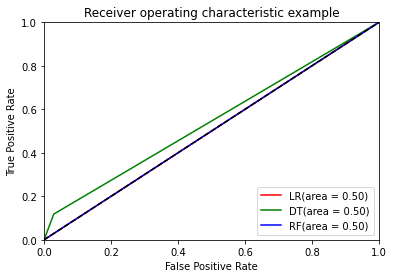

In [104]:
plt.plot(fpr,tpr, label='LR(area = %0.2f)' % auc_log,color='red')
plt.plot(fpr_dt, tpr_dt, label='DT(area = %0.2f)' % auc_dt,color='green')
plt.plot(fpr_rf, tpr_rf, label='RF(area = %0.2f)' % auc_rf,color='blue')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

naive bayes

In [105]:
gnb=GaussianNB()
gnb.fit(x_train,y_train)
print('Train score:',gnb.score(x_train,y_train))
print('Test score:',gnb.score(x_test,y_test))

Train score: 0.15849843587069865
Test score: 0.14977020816436876


In [106]:
nb_pred=gnb.predict(x_test)
fpr2,tpr2,thresh=roc_curve(y_test,nb_pred)
auc2=auc(fpr2,tpr2)

With SMOTE

In [113]:
!pip install -U imbalanced-learn


Requirement already up-to-date: imbalanced-learn in /usr/local/lib/python3.7/dist-packages (0.8.0)


In [115]:
from imblearn.over_sampling import RandomOverSampler


In [117]:
smote=RandomOverSampler(random_state=42)
X_new,Y_new=smote.fit_resample(X,Y)
X_new=pd.DataFrame(X_new,columns=X.columns)
Y_new=pd.DataFrame(Y_new,columns=['Revenue'])
X_new.head()

,Administrative_Duration,Informational_Duration,ProductRelated_Duration,BounceRates,PageValues,Weekend,Administrative_0.0,Administrative_1.0,Administrative_2.0,Administrative_3.0,Administrative_4.0,Administrative_5.0,Administrative_6.0,Administrative_7.0,Administrative_8.0,Administrative_9.0,Administrative_10.0,Administrative_11.0,Administrative_12.0,Administrative_13.0,Administrative_14.0,Administrative_15.0,Administrative_16.0,Administrative_17.0,Administrative_18.0,Administrative_19.0,Administrative_20.0,Administrative_21.0,Administrative_22.0,Administrative_23.0,Administrative_24.0,Administrative_26.0,Administrative_27.0,Informational_0.0,Informational_1.0,Informational_2.0,Informational_3.0,Informational_4.0,Informational_5.0,Informational_6.0,...,Browser_6,Browser_7,Browser_8,Browser_9,Browser_10,Browser_11,Browser_12,Browser_13,Region_1,Region_2,Region_3,Region_4,Region_5,Region_6,Region_7,Region_8,Region_9,TrafficType_1,TrafficType_2,TrafficType_3,TrafficType_4,TrafficType_5,TrafficType_6,TrafficType_7,TrafficType_8,TrafficType_9,TrafficType_10,TrafficType_11,TrafficType_12,TrafficType_13,TrafficType_14,TrafficType_15,TrafficType_16,TrafficType_17,TrafficType_18,TrafficType_19,TrafficType_20,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor
0,0.0,0.0,0.000000,0.20,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,64.000000,0.00,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,-1.0,-1.0,-1.000000,0.20,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,2.666667,0.05,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,627.500000,0.02,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


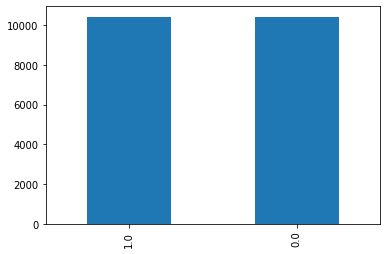

In [118]:
Y_new['Revenue'].value_counts().plot(kind='bar')
plt.show()

In [119]:
x_train,x_test,y_train,y_test=train_test_split(X_new,Y_new,test_size=0.3,random_state=1)


Logistic Regression

In [120]:
log=LogisticRegression(penalty='l1',solver='liblinear')
log.fit(x_train,y_train)
print('Train score:',log.score(x_train,y_train))
print('Test score:',log.score(x_test,y_test))

Train score: 0.7027416038382454
Test score: 0.6917173009274065


In [121]:
log_pred=log.predict(x_test)
print('F1 Score:',f1_score(y_test,log_pred))
print('Kappa Score:',cohen_kappa_score(y_test,log_pred))
print('Classification report:\n',classification_report(y_test,log_pred))

F1 Score: 0.7010852713178294
Kappa Score: 0.384461765371926
Classification report:
               precision    recall  f1-score   support

         0.0       0.72      0.65      0.68      3190
         1.0       0.67      0.74      0.70      3064

    accuracy                           0.69      6254
   macro avg       0.69      0.69      0.69      6254
weighted avg       0.69      0.69      0.69      6254



In [122]:
fpr1,tpr1,thresh=roc_curve(y_test,log_pred)
auc1=auc(fpr1,tpr1)

Naive Bayes

In [123]:
gnb=GaussianNB()
gnb.fit(x_train,y_train)
print('Train score:',gnb.score(x_train,y_train))
print('Test score:',gnb.score(x_test,y_test))

Train score: 0.505071967100754
Test score: 0.490406140070355


In [124]:
nb_pred=gnb.predict(x_test)
fpr2,tpr2,thresh=roc_curve(y_test,nb_pred)
auc2=auc(fpr2,tpr2)

Decision Tree

In [125]:
dt=DecisionTreeClassifier(max_depth=6)
dt.fit(x_train,y_train)
print('Train score:',dt.score(x_train,y_train))
print('Test score:',dt.score(x_test,y_test))

Train score: 0.7217957505140508
Test score: 0.7096258394627438


In [126]:
dt_pred=dt.predict(x_test)
print('F1 Score:',f1_score(y_test,dt_pred))
print('Kappa Score:',cohen_kappa_score(y_test,dt_pred))

F1 Score: 0.7469342251950947
Kappa Score: 0.4229140430707393


In [127]:
fpr3,tpr3,thresh=roc_curve(y_test,dt_pred)
auc3=auc(fpr3,tpr3)

Random Forest

In [128]:
rf_sm=RandomForestClassifier(max_depth=6)
rf_sm.fit(x_train,y_train)
print('Train score:',rf_sm.score(x_train,y_train))
print('Test score:',rf_sm.score(x_test,y_test))

Train score: 0.7138450993831391
Test score: 0.7046690118324273


In [129]:
rf_pred_sm=rf_sm.predict(x_test)
print('F1 Score:',f1_score(y_test,rf_pred_sm))
print('Kappa Score:',cohen_kappa_score(y_test,rf_pred_sm))

F1 Score: 0.7327448994356823
Kappa Score: 0.41206540771817424


In [132]:
fpr4,tpr4,thresh=roc_curve(y_test,rf_pred_sm)
auc4=auc(fpr4,tpr4)

In [130]:
imp=pd.DataFrame(rf_sm.feature_importances_, columns = ["Imp"], index =x_train.columns)

<Figure size 1440x576 with 0 Axes>

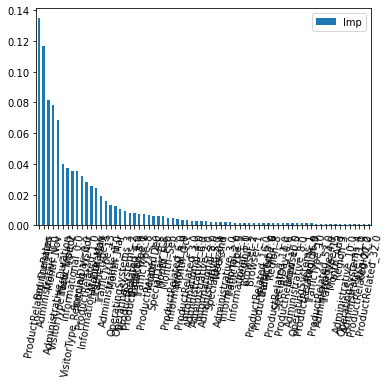

In [131]:
plt.figure(figsize=(20,8))
imp.sort_values('Imp',ascending=False).head(70).plot(kind='bar')
plt.xticks(rotation=80)
plt.show()


In [133]:
imp.sort_values('Imp',ascending=False).head()

,Imp
ProductRelated_Duration,0.134792
BounceRates,0.116887
Administrative_0.0,0.081706
Month_Nov,0.078207
Administrative_Duration,0.068874


In [134]:
imp.sort_values('Imp',ascending=False).head()


,Imp
ProductRelated_Duration,0.134792
BounceRates,0.116887
Administrative_0.0,0.081706
Month_Nov,0.078207
Administrative_Duration,0.068874


In [135]:
imp2=imp[imp["Imp"]>0.0005]
len(imp2['Imp'])

100

Using Random Forest, we found important features: Among 405 dummy+ continuous variables Random Forest could give us 68 important features.

In [136]:
imp2.sort_values('Imp',ascending=False).index

Index(['ProductRelated_Duration', 'BounceRates', 'Administrative_0.0',
       'Month_Nov', 'Administrative_Duration', 'VisitorType_New_Visitor',
       'TrafficType_2', 'Informational_0.0', 'VisitorType_Returning_Visitor',
       'SpecialDay_0.0', 'ProductRelated_1.0', 'Informational_Duration',
       'Month_May', 'TrafficType_3', 'TrafficType_13', 'Administrative_1.0',
       'Month_Mar', 'OperatingSystems_3', 'OperatingSystems_2',
       'ProductRelated_4.0', 'ProductRelated_5.0', 'TrafficType_1',
       'TrafficType_8', 'ProductRelated_2.0', 'Month_Dec', 'SpecialDay_0.8',
       'Month_Feb', 'Month_Sep', 'ProductRelated_6.0', 'Informational_1.0',
       'Month_Oct', 'ProductRelated_3.0', 'Informational_4.0',
       'Administrative_6.0', 'Administrative_2.0', 'Informational_3.0',
       'Administrative_5.0', 'SpecialDay_0.4', 'Weekend', 'Administrative_3.0',
       'Informational_2.0', 'TrafficType_5', 'Informational_5.0', 'Region_1',
       'Browser_2', 'Browser_1', 'ProductRelated_

In [137]:
xnew=X_new[imp2.index]
x_train,x_test,y_train,y_test=train_test_split(xnew,Y_new,test_size=0.3,random_state=1)

Logistic Regression

In [138]:
log=LogisticRegression(penalty='l1',solver='liblinear')
log.fit(x_train,y_train)
print('Train score:',log.score(x_train,y_train))
print('Test score:',log.score(x_test,y_test))

Train score: 0.6880054832076765
Test score: 0.6822833386632555


In [139]:
log_sm1_pred=log.predict(x_test)
print('F1 Score:',f1_score(y_test,log_sm1_pred))
print('Kappa Score:',cohen_kappa_score(y_test,log_sm1_pred))

F1 Score: 0.6941665384023396
Kappa Score: 0.36581699627258524


Decision Tree

In [140]:
dt=DecisionTreeClassifier(max_depth=6)
dt.fit(x_train,y_train)
print('Train score:',dt.score(x_train,y_train))
print('Test score:',dt.score(x_test,y_test))

Train score: 0.7217272104180946
Test score: 0.7094659417972498


In [141]:
dt_sm1_pred_sm=dt.predict(x_test)
print('F1 Score:',f1_score(y_test,dt_sm1_pred_sm))
print('Kappa Score:',cohen_kappa_score(y_test,dt_sm1_pred_sm))

F1 Score: 0.746830151874042
Kappa Score: 0.4225999611595116


Random Forest

In [142]:
rf_sm1=RandomForestClassifier(n_estimators=50,max_depth=16)
rf_sm1.fit(x_train,y_train)
print('Train score:',rf_sm1.score(x_train,y_train))
print('Test score:',rf_sm1.score(x_test,y_test))

Train score: 0.9255654557916381
Test score: 0.8576910777102654


In [143]:
rf_sm1_pred_sm=rf_sm1.predict(x_test)
print('F1 Score:',f1_score(y_test,rf_sm1_pred_sm))
print('Kappa Score:',cohen_kappa_score(y_test,rf_sm1_pred_sm))


F1 Score: 0.8698830409356726
Kappa Score: 0.7165673220208624


In [144]:
fpr5,tpr5,thresh=roc_curve(y_test,rf_sm1_pred_sm)
auc5=auc(fpr5,tpr5)


Gradient Boosting

In [145]:
gb=GradientBoostingClassifier(n_estimators=50,max_depth=5)
gb.fit(x_train,y_train)
print('Train score:',gb.score(x_train,y_train))
print('Test score:',gb.score(x_test,y_test))

Train score: 0.7871144619602467
Test score: 0.7601535017588743


In [146]:
gb_pred_sm=gb.predict(x_test)
print('F1 Score:',f1_score(y_test,gb_pred_sm))
print('Kappa Score:',cohen_kappa_score(y_test,gb_pred_sm))

F1 Score: 0.7778436018957345
Kappa Score: 0.522034607119682


In [147]:
fpr6,tpr6,thresh=roc_curve(y_test,gb_pred_sm)
auc6=auc(fpr6,tpr6)

Plotting ROC Curve for Different Models


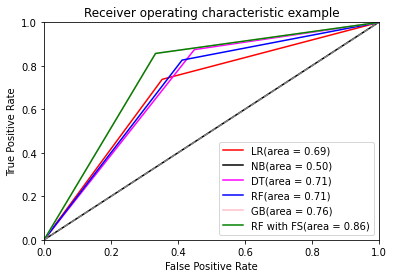

In [148]:
plt.plot(fpr1,tpr1, label='LR(area = %0.2f)' % auc1,color='red')
plt.plot(fpr2, tpr2, label='NB(area = %0.2f)' % auc2,color='black')
plt.plot(fpr3, tpr3, label='DT(area = %0.2f)' % auc3,color='magenta')
plt.plot(fpr4, tpr4, label='RF(area = %0.2f)' % auc4,color='blue')
plt.plot(fpr6, tpr6, label='GB(area = %0.2f)' % auc6,color='pink')
plt.plot(fpr6, tpr6, label='RF with FS(area = %0.2f)' % auc5,color='green')


plt.plot([0, 1], [0, 1], 'k--',color='grey')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

As observed from findings it is clear that the performance improved with SMOTE. Among all models Random Forest With Feature Selection gives best accuracy metrics.



As seen from accuracy metrics and ROC, we can see that Random Forest is best among all as it gives 98% area under, F1 score as 0.90

Transformation improved accuracies for Logistic and Naïve Bayes but it hardly improved Random Forest and Decision Tree. So, we go ahead without transformations as it hardly improves any accuracy.

KNN is a classification technique but due to less computational power we were able to use it. Also, KNN takes more time to

Random Forest was used for feature selection and the important features given by Random Forest are supported by the EDA analysis done

In [149]:
y = df['Revenue']


In [150]:
from sklearn.model_selection import KFold,cross_val_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import classification_report

Cross Validating different model

LR: 0.683313 (std=0.007751)
CART: 0.920840 (std=0.007775)
NB: 0.500671 (std=0.012652)
RF: 0.966849 (std=0.005313)
GBM: 0.731433 (std=0.012663)


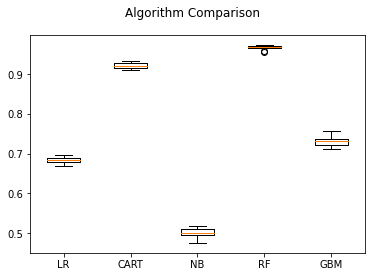

In [153]:
models = []
models.append(('LR', LogisticRegression(penalty='l1',solver='liblinear')))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('RF', RandomForestClassifier()))
models.append(('GBM', GradientBoostingClassifier()))
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = KFold(n_splits=10, shuffle=True,random_state=12345)
    cv_results = cross_val_score(model, xnew, Y_new, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (std=%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()